# Dangers ... and rules to prevent them
(Python bites)
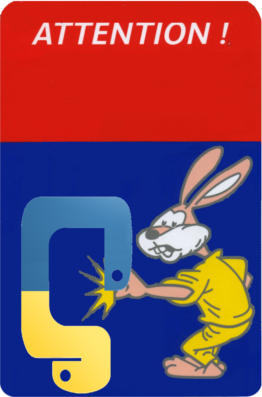

## 1. <span style="color:green"><tt><b>import</b></tt></span> dangers and rules
What are the dangers ?

### 1.1 "Masking" core language functions

 BEWARE : <span style="color:green"><tt><b>%timeit</b></tt></span> slow the execution down

In [5]:
import numpy

Z = numpy.arange(1000)
%timeit sum(Z)
%timeit Z.sum()

95.8 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.64 µs ± 42.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
## DON'T DO THIS, IT IS BAD !!!!!!!!!!!!!!
from numpy import *

Z = arange(1000)
%timeit sum(Z)
%timeit Z.sum()

3.98 µs ± 886 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.78 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 1.2 Unexecution of second import

In [7]:
import numpy # THIS import doesn't cancel the previous import)

Z = numpy.arange(1000)
%timeit sum(Z)
%timeit Z.sum()

3.74 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.76 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
# In JUPYTER, you can RESTART THE KERNEL
# In IPython, you can use %reset 
%reset
import numpy 

Z = numpy.arange(1000)
%timeit sum(Z)
%timeit Z.sum()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
104 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.95 µs ± 542 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 1.3 import rule

 <!-- HTML generated using hilite.me --><div style="background: #ffff00; overflow:auto;width:400pt;border:solid gray;border-width:.1em .1em .1em .1em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%">
 **NEVER USE** :
 <strike><span style="color: #008800; font-weight: bold">from</span> <span style="color: #0e84b5; font-weight: bold">xxxxx</span> <span style="color: #008800; font-weight: bold">import</span> <span style="color: #333333">*</span></strike>
 
 **USE** : 
 <span style="color: #008800; font-weight: bold">import</span> <span style="color: #0e84b5; font-weight: bold">xxxxx</span>
</pre></div>


## 2. Variable naming dangers and rules

What are the dangers ?

### 2.1 Forgetting / confusing the constants without name 
If you plan to buy 2 computers (100€ with no RAM) with 2 CPU, which need 2 Go of RAM each (10€ for 1Go), and you can run 2 threads on each CPU, what are the speed factor and the speed/price ratio?

In [21]:
# Version 1 : constants without name 
print(2*2*2, 2*2/(100+2*10))

8 0.03333333333333333


In [23]:
# Version 2 : constants with names
computer_num = 2
cpu_num= 2
cpu_used_mem_Go = 2
thread_num = 2
computer_price_euro = 100
mem_1Go_price_euro = 10

speed_factor = computer_num*cpu_num*thread_num
total_price = computer_num*(computer_price_euro + cpu_used_mem_Go*mem_1Go_price_euro)
speed_price_ratio = speed_factor/total_price

print(speed_factor, speed_price_ratio)


8 0.03333333333333333


Even if the version 2 is longer to type, it is : 
* less confusing
* easier to read two months later, especially when it is just a small part of a big code
* easier to update (for example if the computer price and the number of CPU have changed)
* no need of extra comments to understand the code
* ...

### 2.2 Confusing user defined objects with pre-defined objects


In [1]:
## DON'T DO THIS, IT IS BAD !!!!!!!!!!!!!!
import string as str  # STRING TYPE name is used for naming string MODULE : NO ERROR
string1 = "I WRoTe strAngELy"
string1.lower()     # No error
str.lower(string1)  # ERROR

AttributeError: module 'string' has no attribute 'lower'

In [2]:
## DON'T DO THIS, IT IS BAD !!!!!!!!!!!!!!
str = "toto"
print(str)   # STRING TYPE name is used for naming a variable : NO ERROR

test_string = "Axis or axes along which a reduction is performed. The default (axis = 0)"

def ordered_words(i_string):
    i_string = i_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list =i_string.split(" ")                                 # split in words
    word_list = [el for el in  word_list if el !='' ]              # remove empty words (liste comprehansion syntax)
    return sorted(word_list, key=str.lower)

print("Ordered word list : ", ordered_words(test_string))

toto


TypeError: lower() takes no arguments (1 given)

### 2.3 Difficulty for reading code

Try to read this code

In [6]:
import string
sort_function = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def myconst(l):
    l = l.translate(str.maketrans('','',"'.,-;:!?"))
    NEW_dic = l.split(" ")                    
    OLD_dic = [l for l in  NEW_dic if l !='' ]    
    return len(OLD_dic)

print(myconst(sort_function))


14


Or this code : 

In [5]:
import string
l1 = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def l(l1):
    l1 = l1.translate(str.maketrans('','',"'.,-;:!?"))
    O = l1.split(" ")                    
    O = [l for l in O if l !='' ]    
    return len(O)

print(l(l1))


14


Writing code is also a matter of style. Many different styles exist. 

If you are contributing to a project, adopt the style of this project

Here are some possible examples, which one do you prefer ?

In [ ]:
## STYLE 1 ##
import string
testStr = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def count_words(iStr):
    iStr = iStr.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    wordList = iStr.split(" ")                                # split in words
    wordList = [el for el in wordList if el !='' ]              # remove empty words
    return len(wordList)

print("Number of words : ", count_words(testStr))

In [ ]:
## STYLE 2 ##
import string
teststr = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def count_words(istr):
    istr = istr.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    wordlist = istr.split(" ")                                # split in words
    wordlist = [el for el in wordlist if el !='' ]              # remove empty words
    return len(wordlist)

print("Number of words : ", count_words(teststr))

In [ ]:
## STYLE 3 : PEP8 compatible ##
import string
test_string = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def count_words(i_string):
    i_string = i_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list = i_string.split(" ")                                # split in words
    word_list = [el for el in word_list if el !='' ]              # remove empty words
    return len(word_list)

print("Number of words : ", count_words(test_string))

In [3]:
## STYLE 4 : VERBOSE ##
import string
string_for_test_of_function = "Axis or axes along which a reduction is performed. The default (axis = 0)"
def count_words_in_a_string(input_string):
    input_string = input_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list_in_the_string = input_string.split(" ")                                # split in words
    word_list_in_the_string = [element for element in word_list_in_the_string if element !='' ]              # remove empty words
    return len(word_list_in_the_string)

print("Number of words : ", count_words_in_a_string(string_for_test_of_function))

Number of words :  14
Number of words :  14
Number of words :  14
Number of words :  14


### Naming variables : a question of balance and style
About the lengths of variable names :
* Too short names may be unclear
* Too long names may make the program lines difficult to read

About style, it is also a matter of taste. Preferences may differ between  
* `nameLikeThis`
* `name_like_this`

In Python, there is an official style guide : [PEP 8](https://www.python.org/dev/peps/pep-0008/)

### 2.4 Variable naming rules


 <!-- HTML generated using hilite.me --><div style="background: #ffff00; overflow:auto;width:960pt;border:solid gray;border-width:.1em .1em .1em .1em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%">
**<span style="color: green;">DO</span>** : :
&dash; **give a name to ALL constants** (exception for 1, maybe 2)
&dash; **include unit** in the name, if it exists (*Ex:* length_meter)
&dash; **use explicit variable name** (*Ex:* test_string)
&dash; *if you have a doubt about the fact the name is already used,* **add precision** *to your variable name.*
  (*Ex:* current_try *instead of* try) 
&dash; *remember to* **change name** *if the type or nature of the variable is changed * (*Ex* : *no* `my_func` *for a string, and no* const *for a variable with changing value*)
&dash; *prefer names that reflect* **usage** *rather than implementation*   (*Ex*: init_text *rather than* string_to_split)

**<span style="color: red;">DON'T</span>** :
&dash; **use too short names**, *that may be ambiguous* (<strike>O</strike>,<strike>l</strike>...)
&dash; **use too general names** (<strike>myvar</strike>,<strike>const</strike>,...)
</pre></div>

NOTE : Advices about object names and coding style are numerous : see for example [PEP 8](https://www.python.org/dev/peps/pep-0008/)

## 3. Object modification dangers and ... advices : 
**What are the dangers ?**

Different cases of implicit object modification ("side effect")

### 3.1 Implicit object modification (global variable)

In [15]:
def func1() :
    b_list.append(777)
    return 0
    
b_list = [4, 3, 'bar']
func1()
print(b_list)

[4, 3, 'bar', 777]


### 3.2 Implicit object modification (multiple references)

In [3]:
a_list = [1, 4, 'foo']
b_list = a_list
print(b_list)
a_list.append(666)
print(b_list)

[1, 4, 'foo']
[1, 4, 'foo', 666]


### 3.3 Less implicit object modification (input argument)

In [13]:
def func1(a_list) :
    a_list.append(777)
    
b_list = [4, 3, 'bar']
func1(b_list)
print(b_list)

[4, 3, 'bar', 777]


### 3.4 Implicit object modification (nested functions)

In [4]:
def main_function():
    def nested_try_to_modify_local():
        my_list.append(666)    

    my_list=['foo']
    print(my_list)
    nested_try_to_modify_local()
    print(my_list)
    # NOT_nested_try_to_modify_local() # CRASHES
    print(my_list)
    
def NOT_nested_try_to_modify_local():
        my_list.append(666)    

main_function()


['foo']
['foo', 666]
['foo', 666]


### 3.4 Advices about modifying objects... and more 

 <!-- HTML generated using hilite.me --><div style="background: #ffff00; overflow:auto;width:990pt;border:solid gray;border-width:.1em .1em .1em .1em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%">
**<span style="color: #008800;">DO</span>** :
&dash; **give explicit name to functions that modify an input argument** (*Ex :* set_size )
&dash; **avoid multiple references**

**<span style="color: red;">DON'T</span>** :
&dash; **use global variables** (*exception : very short programs*)
&dash; **use nested functions** 
&dash; **write functions that return a result and modify input argument at the same time** 
</div>


## 4. Repeating code : 
**What are the dangers ?**

Different copies of code with small differences : when you want to change your way of coding you have to change several parts of the code.


### 4.1 Example

In [11]:
##### VERSION 1 : WITH CODE REPETIONS ######
import string
test_string = "Python is probably one of the few programming languages which is both simple and powerful. This is good for beginners as well as for experts, and more importantly, is fun to program with. This book aims to help you learn this wonderful language and show how to get things done quickly and painlessly - in effect 'The Anti-venom to your programming problems'. Excerpt from A byte of Python"

def get_key_lex(i_string):
    return i_string.lower()

def count_words(i_string):
    i_string = i_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list = i_string.split(" ")                                # split in words
    word_list = [el for el in  word_list if el !='' ]              # remove empty words
    return len(word_list)

def ordered_words(i_string,sorter):
    i_string = i_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list =i_string.split(" ")                                 # split in words
    word_list = [el for el in  word_list if el !='' ]              # remove empty words (liste comprehansion syntax)
    return sorted(word_list, key=sorter)

print("1. Number of words :", count_words(test_string), "\n")
print("2.A. Ordered word list (lexical order) :\n", ordered_words(test_string, sorter=get_key_lex), "\n")


1. Number of words : 67 

2.A. Ordered word list (lexical order) :
 ['A', 'aims', 'and', 'and', 'and', 'and', 'Antivenom', 'as', 'as', 'beginners', 'book', 'both', 'byte', 'done', 'effect', 'Excerpt', 'experts', 'few', 'for', 'for', 'from', 'fun', 'get', 'good', 'help', 'how', 'importantly', 'in', 'is', 'is', 'is', 'is', 'language', 'languages', 'learn', 'more', 'of', 'of', 'one', 'painlessly', 'powerful', 'probably', 'problems', 'program', 'programming', 'programming', 'Python', 'Python', 'quickly', 'show', 'simple', 'the', 'The', 'things', 'This', 'This', 'this', 'to', 'to', 'to', 'to', 'well', 'which', 'with', 'wonderful', 'you', 'your'] 



In [10]:
##### VERSION 2 : WITH A NEW FUNCTION ######
import string
test_string = "Python is probably one of the few programming languages which is both simple and powerful. This is good for beginners as well as for experts, and more importantly, is fun to program with. This book aims to help you learn this wonderful language and show how to get things done quickly and painlessly - in effect 'The Anti-venom to your programming problems'. Excerpt from A byte of Python"

def get_key_lex(i_string):
    return i_string.lower()

def extract_word_list(i_string):
    i_string = i_string.translate(str.maketrans('','',"'.,-;:!?")) # delete punctuation marks
    word_list = i_string.split(" ")                                # split in words
    word_list = [el for el in word_list if el !='']                # remove empty words
    return word_list

def count_words(i_string):
    word_list = extract_word_list(i_string)
    return len(word_list)

def ordered_words(i_string, sorter):
    word_list = extract_word_list(i_string)
    return sorted(word_list, key=sorter)

print("1. Number of words :", count_words(test_string), "\n")
print("2.A. Ordered word list (lexical order) :\n", ordered_words(test_string, sorter=get_key_lex), "\n")


1. Number of words : 67 

2.A. Ordered word list (lexical order) :
 ['A', 'aims', 'and', 'and', 'and', 'and', 'Antivenom', 'as', 'as', 'beginners', 'book', 'both', 'byte', 'done', 'effect', 'Excerpt', 'experts', 'few', 'for', 'for', 'from', 'fun', 'get', 'good', 'help', 'how', 'importantly', 'in', 'is', 'is', 'is', 'is', 'language', 'languages', 'learn', 'more', 'of', 'of', 'one', 'painlessly', 'powerful', 'probably', 'problems', 'program', 'programming', 'programming', 'Python', 'Python', 'quickly', 'show', 'simple', 'the', 'The', 'things', 'This', 'This', 'this', 'to', 'to', 'to', 'to', 'well', 'which', 'with', 'wonderful', 'you', 'your'] 



### 4.2 Advices about repeating code 

 <!-- HTML generated using hilite.me --><div style="background: #ffff00; overflow:auto;width:990pt;border:solid gray;border-width:.1em .1em .1em .1em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%">
**<span style="color: #008800;">DO</span>** :
&dash; **write functions**

**<span style="color: red;">DON'T</span>** :
&dash; **copy / paste code**
</div>




### Ressources :
* [Pylint](https://www.pylint.org/)
* [Pycodestyle](https://github.com/PyCQA/pycodestyle)
* [Hitchhiker code style](https://docs.python-guide.org/writing/style/)
* [Code like a pythonista](https://david.goodger.org/projects/pycon/2007/idiomatic/handout.html)
* [Google Python Guide Style](https://google.github.io/styleguide/pyguide.html)
* [Tests in Python](https://docs.python-guide.org/writing/tests/)


### Copyright
Copyright (C)  2017-2020  Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca under GDFL <a class="anchor" id="GFDL"></a>

Permission is granted to copy, distribute and/or modify this document under the terms of the GNU Free Documentation License, Version 1.3 or any later version published by the Free Software Foundation;   
with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.

A copy of the license is included in the section entitled "[GNU Free Documentation License](https://www.gnu.org/licenses/fdl-1.3-standalone.html)".